In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("/content/archive (1).zip", encoding='latin-1')

In [3]:
print("DataFrame Shape:")
print(df.shape)
print("\nDataFrame Info:")
print(df.info())
print("\nNull Values Summary:")
print(df.isnull().sum())


DataFrame Shape:
(15509, 10)

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB
None

Null Values Summary:
Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64


In [4]:
df = df.dropna()
print("\nDataFrame Shape after dropping NA rows:")
print(df.shape)


DataFrame Shape after dropping NA rows:
(5659, 10)


In [5]:
print("\nNumber of Duplicates:")
print(df.duplicated().sum())



Number of Duplicates:
0


In [6]:
df['Duration'] = df['Duration'].str.replace('min', '').apply(pd.to_numeric)
df["Votes"] = df["Votes"].replace("$5.16M", 516)
df["Votes"] = pd.to_numeric(df['Votes'].str.replace(',', ''))
df['Year'] = df['Year'].str.extract('(\d+)').astype(float)

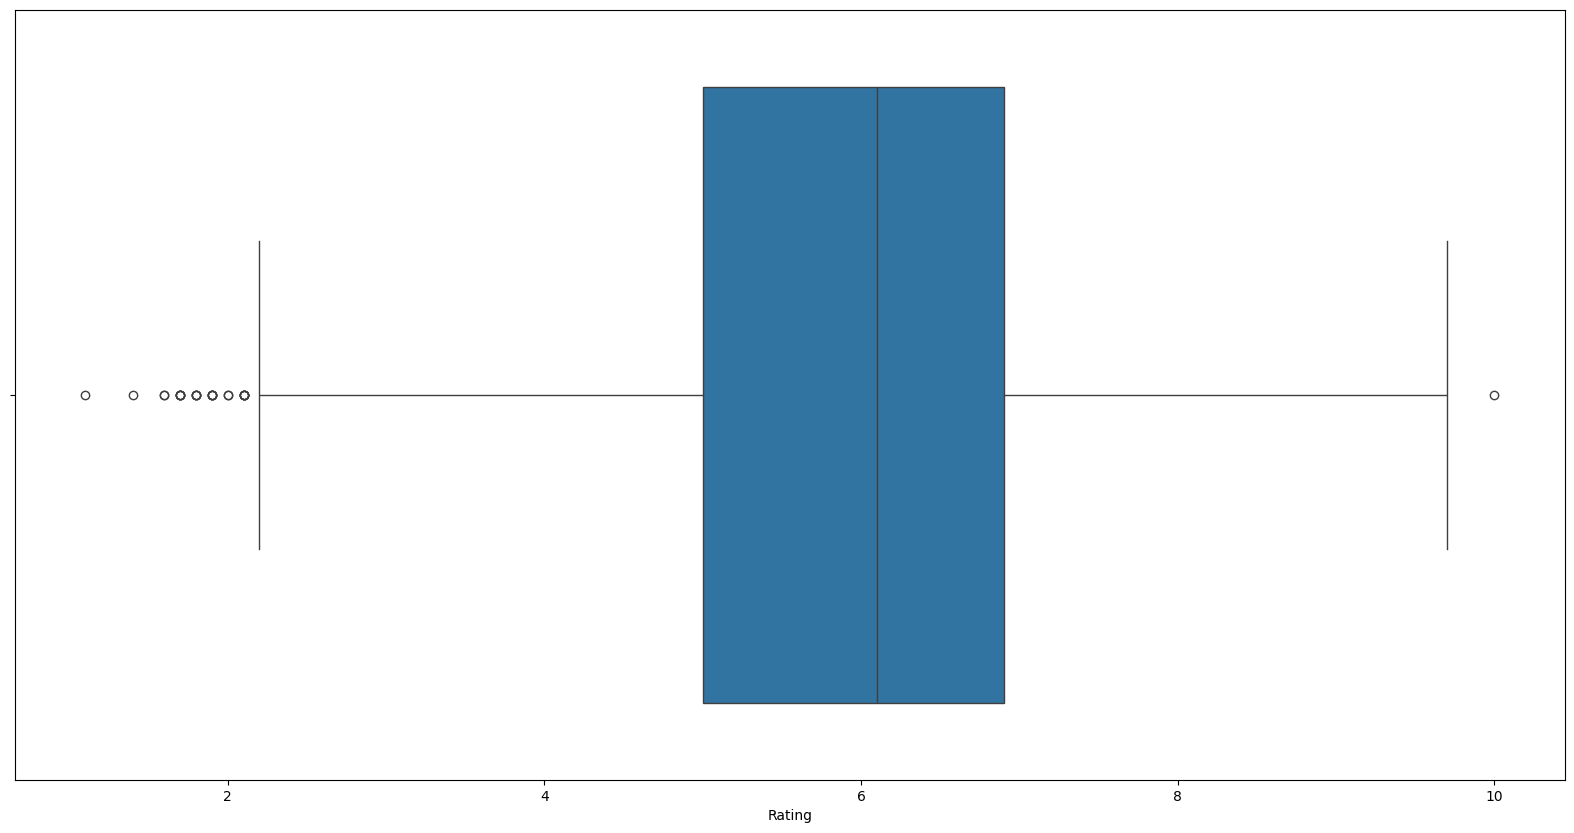

In [7]:
plt.figure(figsize=(20, 10))
sns.boxplot(x=df['Rating'])
plt.show()

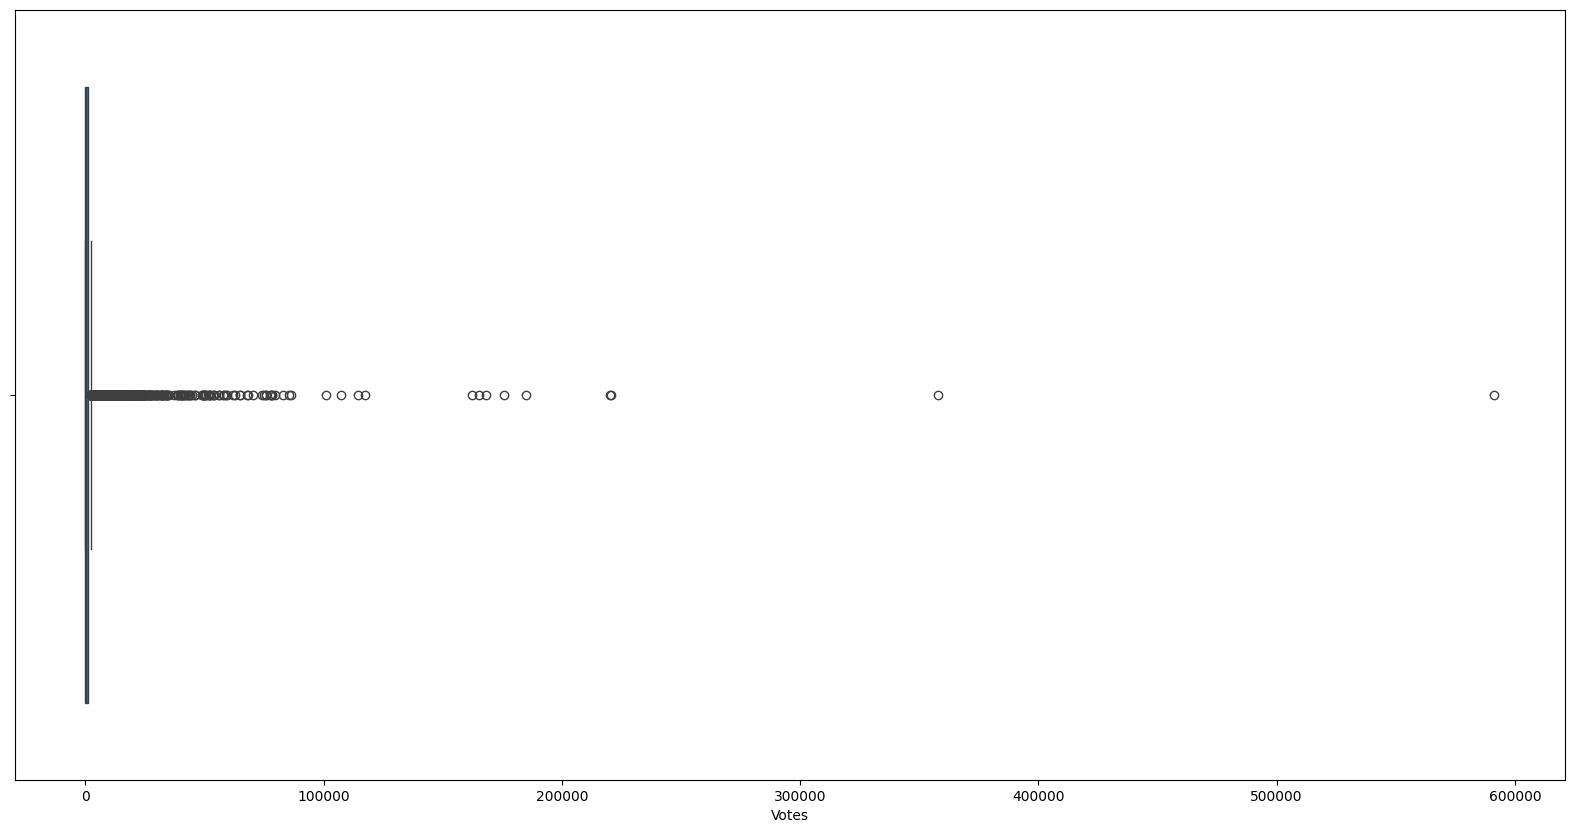

In [8]:
plt.figure(figsize=(20, 10))
sns.boxplot(x=df['Votes'])
plt.show()

In [9]:
year_counts = df['Year'].value_counts().sort_index()
years = year_counts.index

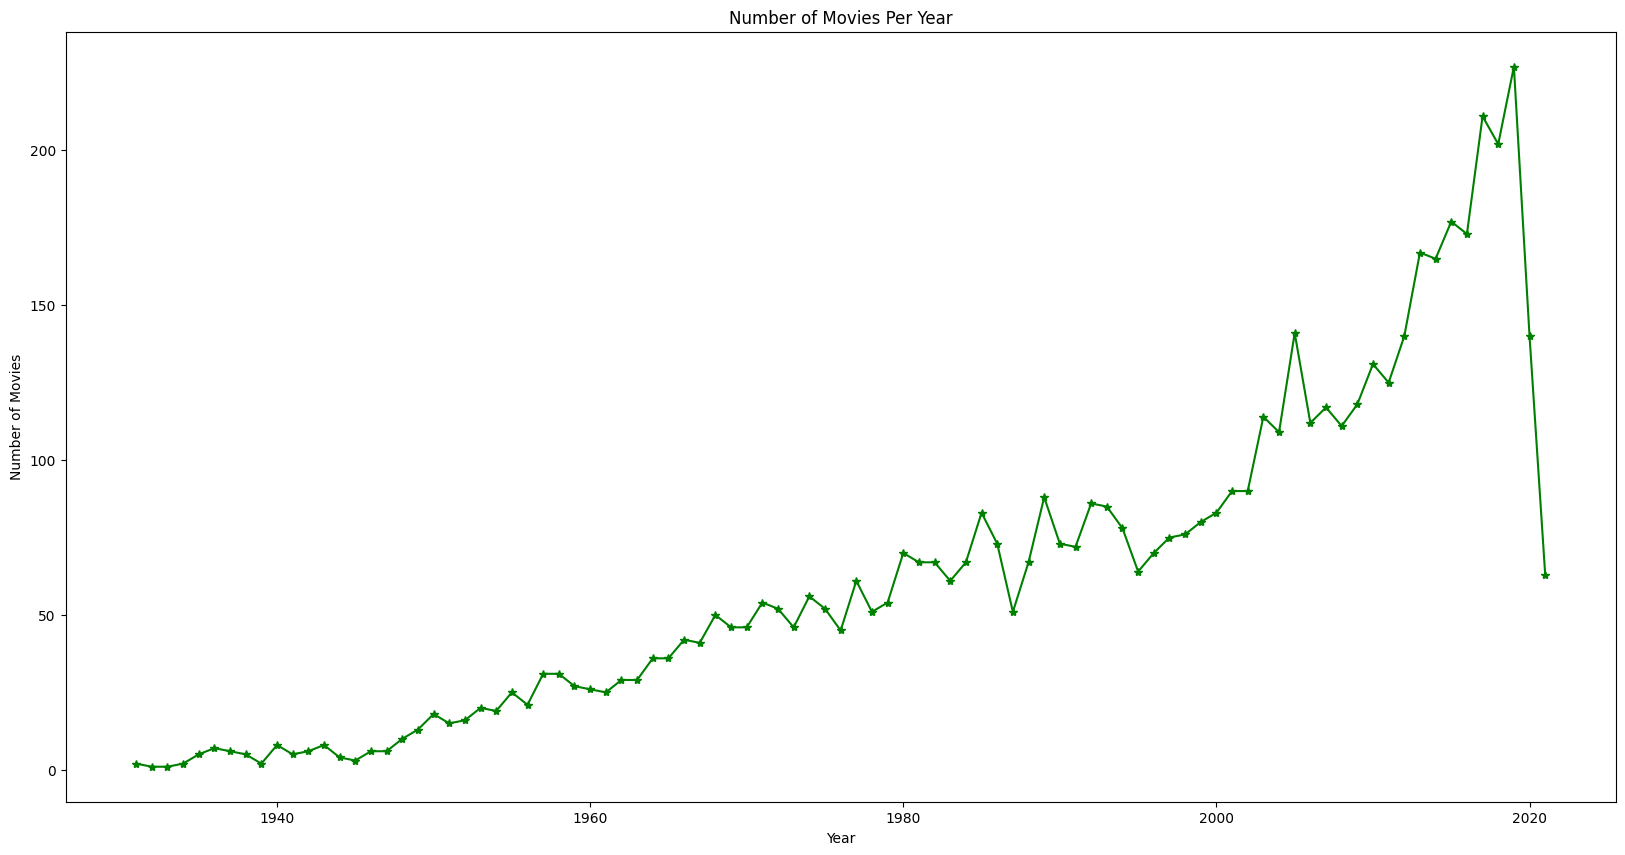

In [10]:
plt.figure(figsize=(20, 10))
plt.plot(years, year_counts, marker='*', color='green')
plt.title('Number of Movies Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.show()

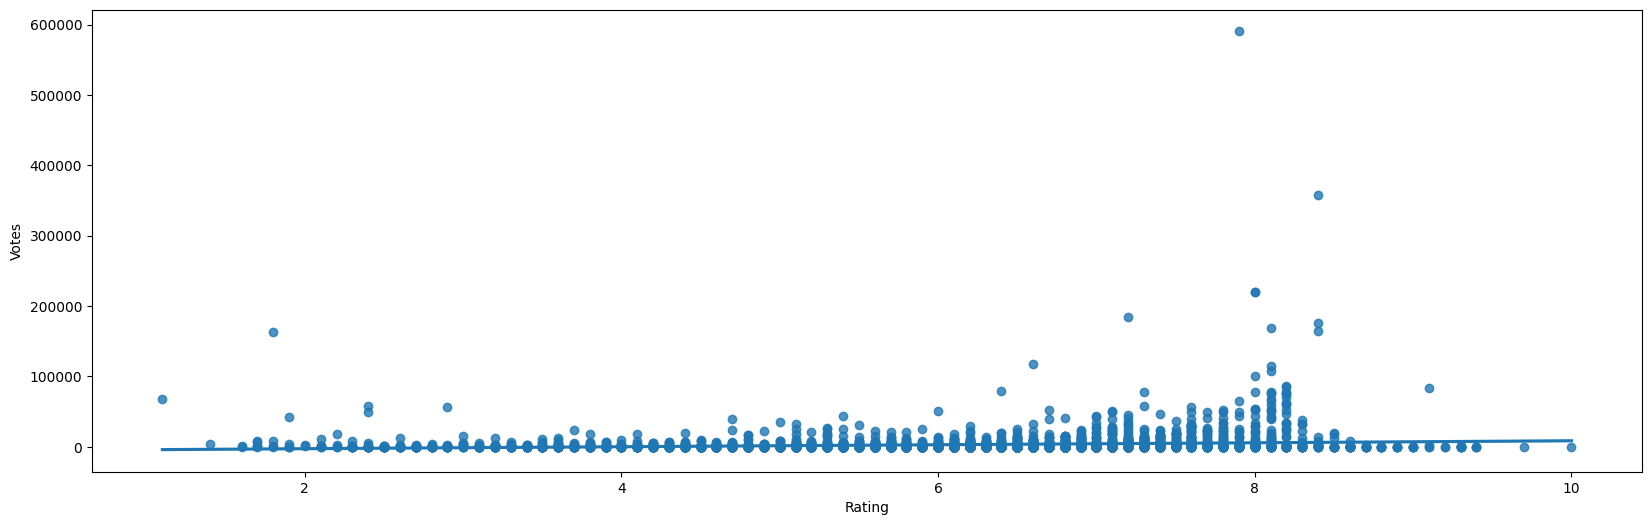

In [11]:
plt.figure(figsize=(20, 6))
sns.regplot(x=df['Rating'], y=df['Votes'])
plt.show()

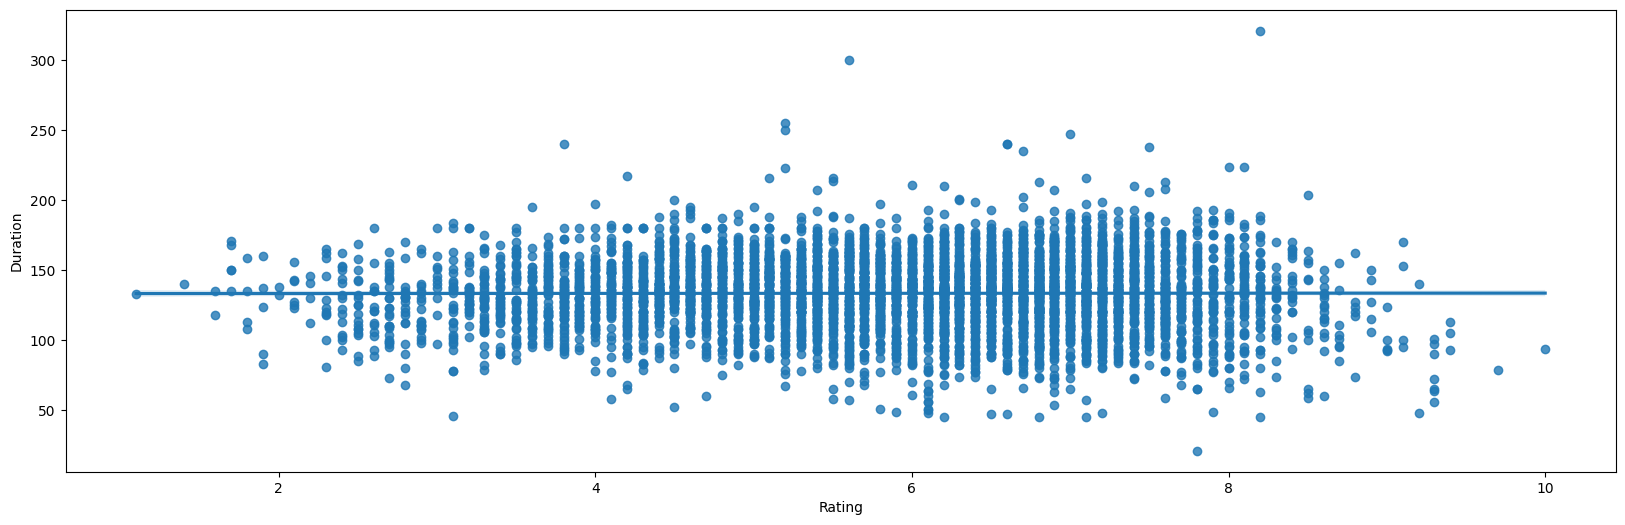

In [12]:
plt.figure(figsize=(20, 6))
sns.regplot(x=df['Rating'], y=df['Duration'])
plt.show()

In [13]:
def TopTenPlot(column, color):
    df[column].value_counts().sort_values(ascending=False)[:10].plot(kind="bar", figsize=(20, 6), edgecolor="k", color=color)
    plt.xticks(rotation=0)
    plt.title("Top Ten {}".format(column))
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.show()

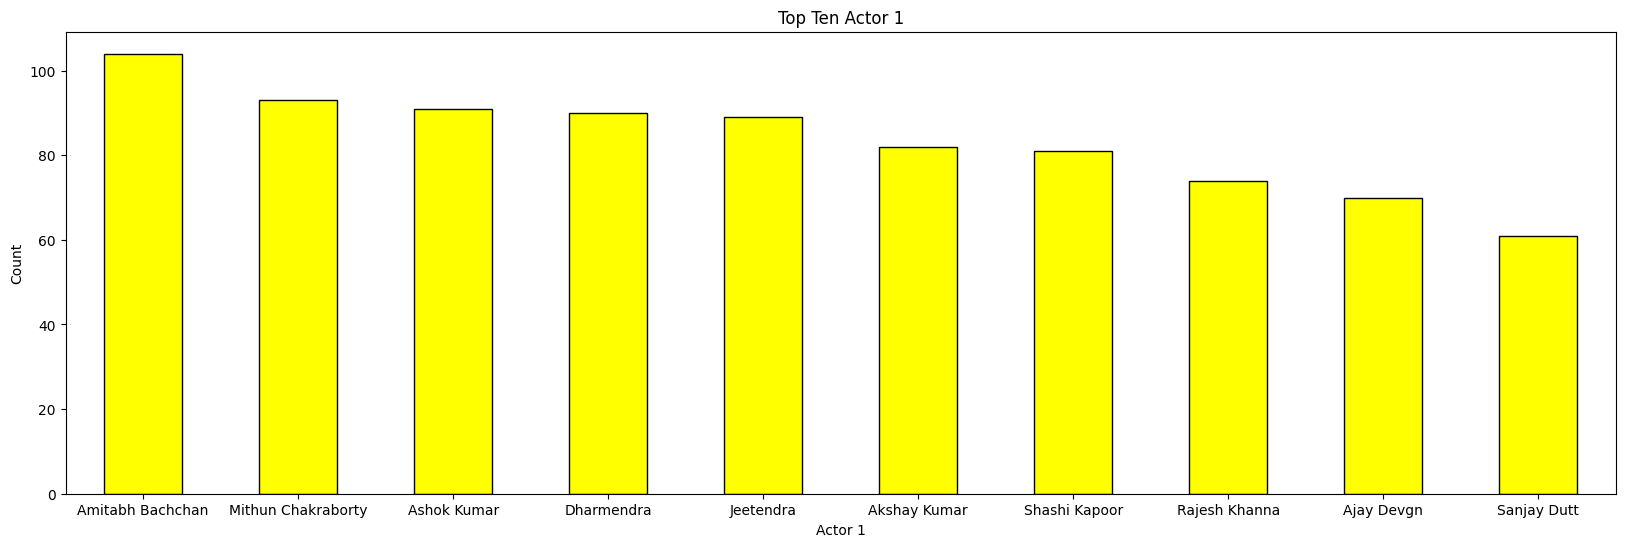

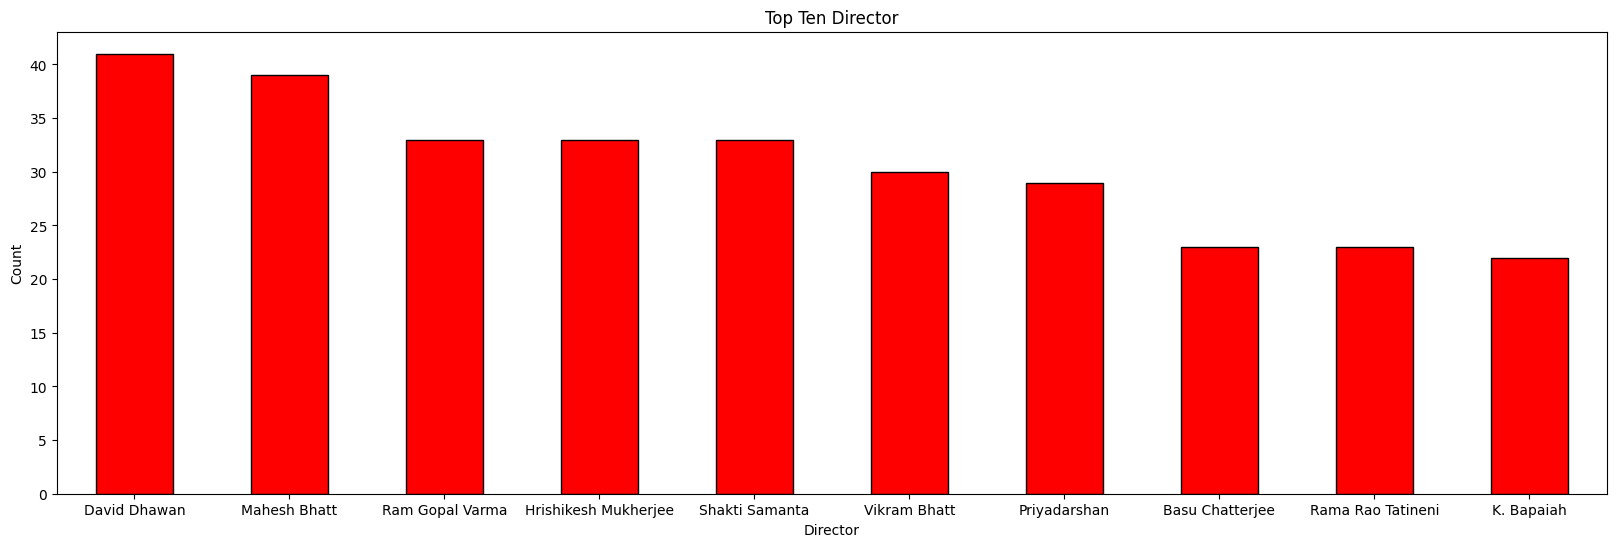

In [14]:
TopTenPlot('Actor 1', 'yellow')
TopTenPlot('Director', 'red')

In [15]:
df["Actor"] = df['Actor 1'] + ', ' + df['Actor 2'] + ', ' + df['Actor 3']
df["Directors"] = df['Director'].astype('category').cat.codes.astype('int64')
df["Genres"] = df['Genre'].astype('category').cat.codes.astype('int64')
df["Actors"] = df['Actor'].astype('category').cat.codes.astype('int64')

In [16]:
x = df.drop(columns=['Name', 'Rating', 'Actor 1', 'Actor 2', 'Actor 3', 'Director', 'Genre', 'Actor'], axis=1)
y = df['Rating']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [17]:
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=1),
    "Decision Tree": DecisionTreeRegressor(random_state=1),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=60),
    "K Nearest Neighbors": KNeighborsRegressor(n_neighbors=5)
}

In [18]:
for name, model in models.items():
    model.fit(x_train, y_train)
    preds = model.predict(x_test)
    print("\nModel:", name)
    print("Accuracy:", model.score(x_test, y_test))
    print("Mean Squared Error:", mean_squared_error(y_test, preds, squared=False))


Model: Linear Regression
Accuracy: 0.0880162396662314
Mean Squared Error: 1.2995230408010765

Model: Random Forest
Accuracy: 0.3237758095335025
Mean Squared Error: 1.1190146773195324

Model: Decision Tree
Accuracy: -0.32679837433064907
Mean Squared Error: 1.5674471153324305

Model: Gradient Boosting
Accuracy: 0.33497656888564387
Mean Squared Error: 1.1097084811311324

Model: K Nearest Neighbors
Accuracy: -0.013760210378260362
Mean Squared Error: 1.370118253388572
